<a href="https://colab.research.google.com/github/Joseph89155/Digit-classification-using-ANN/blob/main/Image_Classification_with_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification with Artificial Neural Networks (ANN) using the MNIST Dataset

## 📌 Project Overview

This project focuses on building and training an Artificial Neural Network (ANN) using TensorFlow/Keras to classify handwritten digits from the MNIST dataset. The MNIST dataset is a benchmark in the field of machine learning and computer vision, containing 70,000 grayscale images of handwritten digits (0 to 9). Each image is 28x28 pixels in size, and the dataset is split into 60,000 training images and 10,000 testing images.

By completing this project, we aim to:

- Understand how to preprocess image data for neural networks
- Visualize and interpret image-based data
- Construct a robust ANN architecture suitable for image classification
- Apply regularization techniques to prevent overfitting
- Evaluate model performance using accuracy, confusion matrix, and classification metrics
- Visualize model learning dynamics (loss/accuracy over epochs)
- Save and load trained models in modern formats for reuse

## 🧠 Real-Life Relevance

Handwritten digit recognition has many real-world applications, including:
- Postal code and cheque digit recognition
- Automatic form digitization
- Mobile device handwriting input
- Preprocessing for document scanning and OCR pipelines

Although the MNIST dataset is a simplified benchmark, it represents the foundational challenges in real-world image classification tasks — interpreting noisy, low-resolution image data and generalizing across varying handwriting styles.

## ✅ Technologies Used
- **Python**
- **TensorFlow / Keras**
- **Matplotlib & Seaborn**
- **Scikit-learn**

## 🎯 Project Goal
Train an ANN capable of achieving high accuracy in recognizing handwritten digits from the MNIST dataset, and interpret its performance through metrics and visual tools.


### Load the MNIST Dataset

The MNIST dataset is a collection of 70,000 handwritten digit images, split into 60,000 training images and 10,000 test images. Each image is a grayscale 28x28 pixel image. The dataset is built into TensorFlow via `tensorflow.keras.datasets`.

In this step, we will load the dataset into training and testing variables for further preprocessing.


In [1]:
from tensorflow.keras.datasets import mnist

# Load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Check the shapes of the datasets
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


### Visualizing Sample Images from the MNIST Dataset

Before diving into model building, it's important to **visually explore the dataset**. In this step, we display **9 randomly selected images** from the MNIST training data.

This helps us understand:
- The quality and clarity of the handwritten digits
- The variation in handwriting style and stroke thickness
- That labels (0–9) match the actual digits

Such visualization is a key part of the **Exploratory Data Analysis (EDA)** process in deep learning projects. It ensures that the input data is what we expect before feeding it into a model.


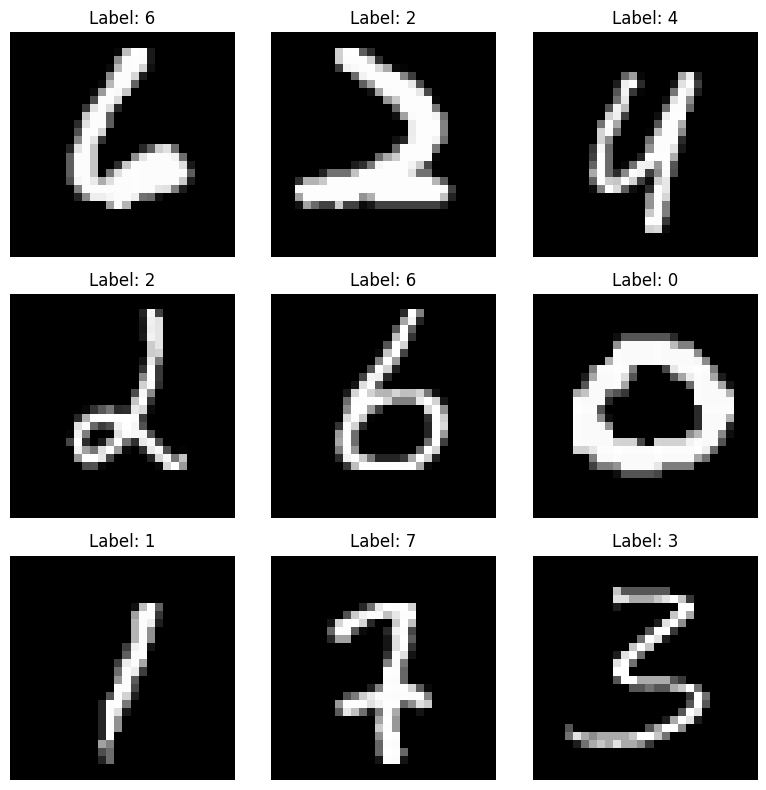

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Set the figure size
plt.figure(figsize=(8, 8))

# Randomly select 9 images from the training set
indices = np.random.choice(len(X_train), 9, replace=False)

for i, idx in enumerate(indices):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[idx], cmap='gray')
    plt.title(f"Label: {y_train[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

### Normalizing Pixel Values

Neural networks perform better when input data is **scaled to a consistent range**. Since each pixel in the MNIST dataset has an intensity between **0 and 255**, we normalize the values by dividing them by 255.0.

This results in pixel values ranging from **0 to 1**, which helps:
- Speed up the training process
- Improve gradient descent convergence
- Reduce the risk of exploding/vanishing gradients

This normalization step is a **best practice** in deep learning workflows.


In [5]:
# Convert pixel values from [0, 255] to [0, 1] by dividing by 255.0
x_train_norm = X_train / 255.0
x_test_norm = X_test / 255.0

### One-Hot Encoding the Labels

The target labels in the MNIST dataset are integer values from **0 to 9**, each representing a digit class.

Neural networks trained with **categorical cross-entropy loss** require the labels to be in **one-hot encoded** format. This transforms a label like `3` into `[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]`.

We use TensorFlow/Keras’s `to_categorical` utility to efficiently convert the integer labels into 10-dimensional binary vectors.

This format:
- Aligns with the 10 output neurons of our model
- Ensures proper error calculation during training


In [6]:
from tensorflow.keras.utils import to_categorical
# One-hot encode the labels
y_train_encoded = to_categorical(y_train, num_classes=10)
y_test_encoded = to_categorical(y_test, num_classes=10)

###Confirm Dataset Shapes and Preprocessing

Before proceeding to model design, we confirm that the input and output data are correctly shaped:

- **X_train**: `(60000, 28, 28)` — 60,000 grayscale images of size 28×28 pixels
- **y_train_encoded**: `(60000, 10)` — one-hot encoded labels for 10 digit classes
- **X_test**: `(10000, 28, 28)` — test set images
- **y_test_encoded**: `(10000, 10)` — test set labels

We also check a sample one-hot encoded label to verify that it has exactly one active class (`sum = 1`), confirming proper encoding.


In [7]:
# Confirm the shapes of the processed data
print("X_train shape:", X_train.shape)
print("y_train_encoded shape:", y_train_encoded.shape)
print("X_test shape:", X_test.shape)
print("y_test_encoded shape:", y_test_encoded.shape)

# Optionally inspect a single example and label
print("\nSample label (one-hot):", y_train_encoded[0])
print("Sum of one-hot vector (should be 1):", y_train_encoded[0].sum())


X_train shape: (60000, 28, 28)
y_train_encoded shape: (60000, 10)
X_test shape: (10000, 28, 28)
y_test_encoded shape: (10000, 10)

Sample label (one-hot): [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Sum of one-hot vector (should be 1): 1.0


### Define the Model Architecture

In this step, we construct an Artificial Neural Network (ANN) using TensorFlow/Keras' Sequential API. The model is specifically tailored for image classification on the MNIST dataset.

**Model Structure**:
- **Input Layer**: A `Flatten` layer reshapes the 28x28 pixel input images into a 784-dimensional vector to be fed into the neural network.
- **Hidden Layers**:
  - The first hidden layer contains 128 neurons with **ReLU** activation to introduce non-linearity.
  - A `Dropout` layer with a dropout rate of **0.3** is used to prevent overfitting by randomly deactivating 30% of the neurons during training.
  - The second hidden layer has 64 neurons, also with **ReLU** activation, followed by another `Dropout(0.3)` layer.
- **Output Layer**: A `Dense` layer with **10 neurons** (one for each digit from 0 to 9), using **softmax** activation to produce a probability distribution across the classes.

This structure balances model capacity and regularization, which is ideal for a relatively small and clean dataset like MNIST.


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

# Define the model
model = Sequential([
    Flatten(input_shape=(28, 28)),               # Flatten the 28x28 input images
    Dense(128, activation='relu'),               # First hidden layer with 128 neurons
    Dropout(0.3),                                # Dropout layer to reduce overfitting
    Dense(64, activation='relu'),                # Second hidden layer with 64 neurons
    Dropout(0.3),                                # Another dropout layer
    Dense(10, activation='softmax')              # Output layer with 10 classes (digits 0–9)
])

# View the model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

### Compile the Model

We compiled the model using the **Adam** optimizer, which adapts the learning rate dynamically and works well for most deep learning tasks. The loss function selected is **categorical_crossentropy**, which is ideal for multi-class classification problems with one-hot encoded labels.

We chose **accuracy** as the primary metric to evaluate the model's performance during training and validation.

The model is now ready to be trained in the next step.


In [9]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Train the Model

We trained the Artificial Neural Network (ANN) on the MNIST training dataset for **10 epochs** using a **batch size of 128**. During training, **10% of the training data** was reserved for validation in order to monitor generalization performance.

The training process returns a `history` object, which captures metrics such as training loss, validation loss, training accuracy, and validation accuracy for each epoch. This will be used for visualization in the next step.


In [10]:
# Train the model
history = model.fit(X_train, y_train_encoded,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.1,
                    verbose=2)

Epoch 1/10
422/422 - 5s - 13ms/step - accuracy: 0.4850 - loss: 6.3382 - val_accuracy: 0.7320 - val_loss: 0.9440
Epoch 2/10
422/422 - 3s - 7ms/step - accuracy: 0.6353 - loss: 1.2424 - val_accuracy: 0.8187 - val_loss: 0.7063
Epoch 3/10
422/422 - 5s - 11ms/step - accuracy: 0.7218 - loss: 0.9924 - val_accuracy: 0.8628 - val_loss: 0.5704
Epoch 4/10
422/422 - 2s - 6ms/step - accuracy: 0.7657 - loss: 0.8590 - val_accuracy: 0.8890 - val_loss: 0.4502
Epoch 5/10
422/422 - 4s - 8ms/step - accuracy: 0.7960 - loss: 0.7333 - val_accuracy: 0.9045 - val_loss: 0.3503
Epoch 6/10
422/422 - 2s - 5ms/step - accuracy: 0.8144 - loss: 0.6380 - val_accuracy: 0.9188 - val_loss: 0.3192
Epoch 7/10
422/422 - 3s - 7ms/step - accuracy: 0.8303 - loss: 0.5772 - val_accuracy: 0.9303 - val_loss: 0.2706
Epoch 8/10
422/422 - 2s - 5ms/step - accuracy: 0.8454 - loss: 0.5295 - val_accuracy: 0.9300 - val_loss: 0.2542
Epoch 9/10
422/422 - 2s - 6ms/step - accuracy: 0.8587 - loss: 0.4884 - val_accuracy: 0.9378 - val_loss: 0.2319

### Plot Training and Validation Curves

To evaluate the model's learning dynamics, we plotted the training and validation accuracy and loss across all 10 epochs.

- The **accuracy** graph shows a steady improvement, with both training and validation performance increasing over time.
- The **loss** graph shows a consistent decline, indicating that the model is learning effectively without signs of overfitting.

This suggests that the architecture and training configuration are well-tuned for this task.


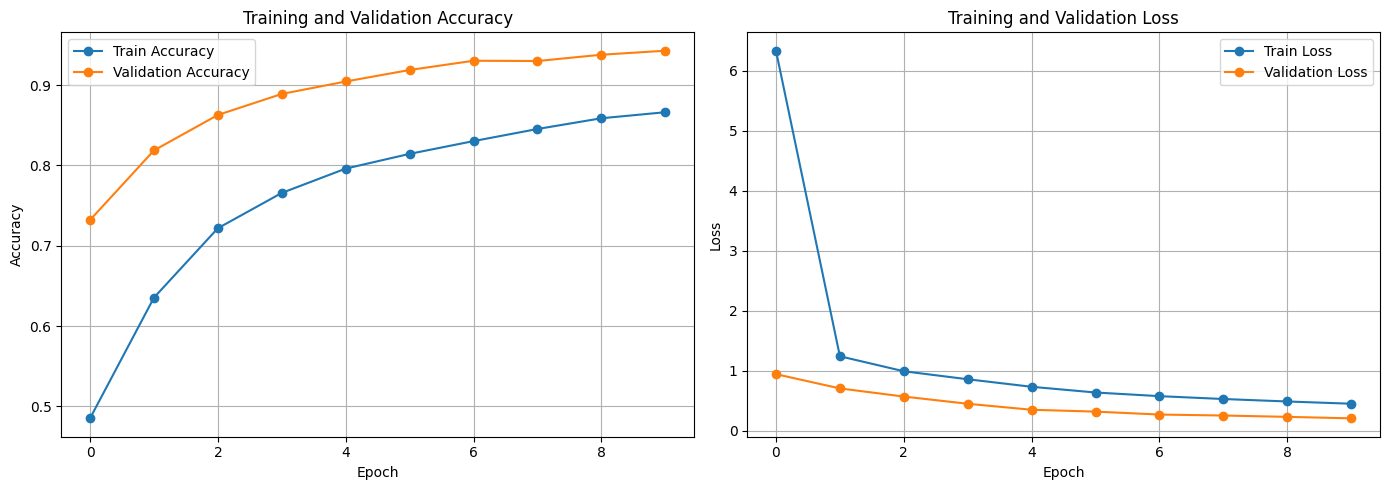

In [11]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### Model Evaluation on Test Set

To assess the final performance of our neural network, we evaluated it on the test dataset, which contains 10,000 previously unseen images.

The evaluation provides two key metrics:
- **Test Accuracy**: The percentage of correctly classified digits
- **Test Loss**: The overall loss on the test data using the categorical cross-entropy function

A high test accuracy with a low test loss confirms that our model generalizes well beyond the training data.


In [12]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded, verbose=2)

print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

313/313 - 1s - 2ms/step - accuracy: 0.9304 - loss: 0.2633

Test Accuracy: 93.04%
Test Loss: 0.2633


### Predicting & Evaluating Model Performance

Before saving the model, we assess its performance in more detail:

1. **Predictions** are made on the test data using `model.predict()`, and converted from one-hot to class labels.
2. A **confusion matrix** is plotted using `seaborn.heatmap`, showing how well the model distinguishes between classes.
3. A **classification report** displays:
   - **Precision**: Accuracy of positive predictions
   - **Recall**: Coverage of actual positive cases
   - **F1-score**: Harmonic mean of precision and recall

These metrics provide valuable insight into model strengths and weaknesses for each digit class.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


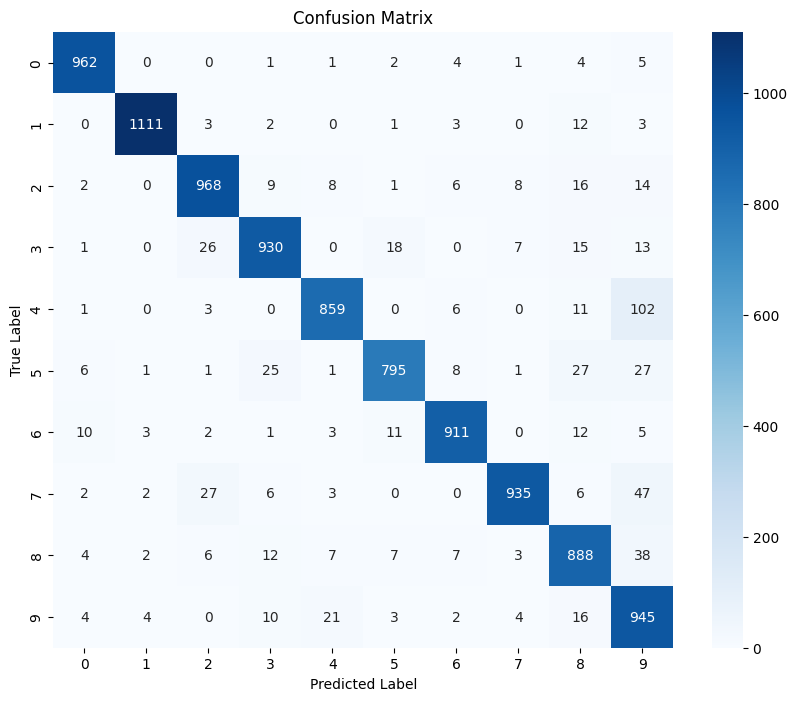

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.99      0.98      0.98      1135
           2       0.93      0.94      0.94      1032
           3       0.93      0.92      0.93      1010
           4       0.95      0.87      0.91       982
           5       0.95      0.89      0.92       892
           6       0.96      0.95      0.96       958
           7       0.97      0.91      0.94      1028
           8       0.88      0.91      0.90       974
           9       0.79      0.94      0.86      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [13]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Predict class probabilities
y_pred_probs = model.predict(X_test)

# 2. Convert one-hot encoded predictions and labels to class labels
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test_encoded, axis=1)

# 3. Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# 4. Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 5. Classification Report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes))


### Saving the Model

We save the trained Artificial Neural Network to an HDF5 file (`mnist_ann_model.h5`). This allows us to:
- Reload the model later for inference or further training
- Deploy the model in production environments
- Share the model with collaborators or integrate it into an app

The `.h5` format stores the model architecture, weights, and training configuration in a single file.


In [14]:
# Save the trained model
model.save("mnist_ann_model.h5")